Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
⏩ İLK 5 SATIR:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



🔍 TEMEL BİLGİLER:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None


📊 BETİMSEL İSTATİSTİKLER:


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200



❗ EKSİK VERİLER:


,0
Cabin,687
Age,177
Embarked,2



👥 YAŞ İÇİN GRUP ORTALAMALARI (sex ve pclass'a göre):


Sex     Pclass
female  1         34.6
        2         28.7
        3         21.8
male    1         41.3
        2         30.7
        3         26.5
Name: Age, dtype: float64


✅ SON DURUM:
Eksik yaş kaldı mı? 0
Z-score istatistikleri:


,fare_zscore
count,8.910000e+02
mean,3.987333e-18
std,1.000562e+00
min,-6.484217e-01
25%,-4.891482e-01
50%,-3.573909e-01
75%,-2.424635e-02
max,9.667167e+00


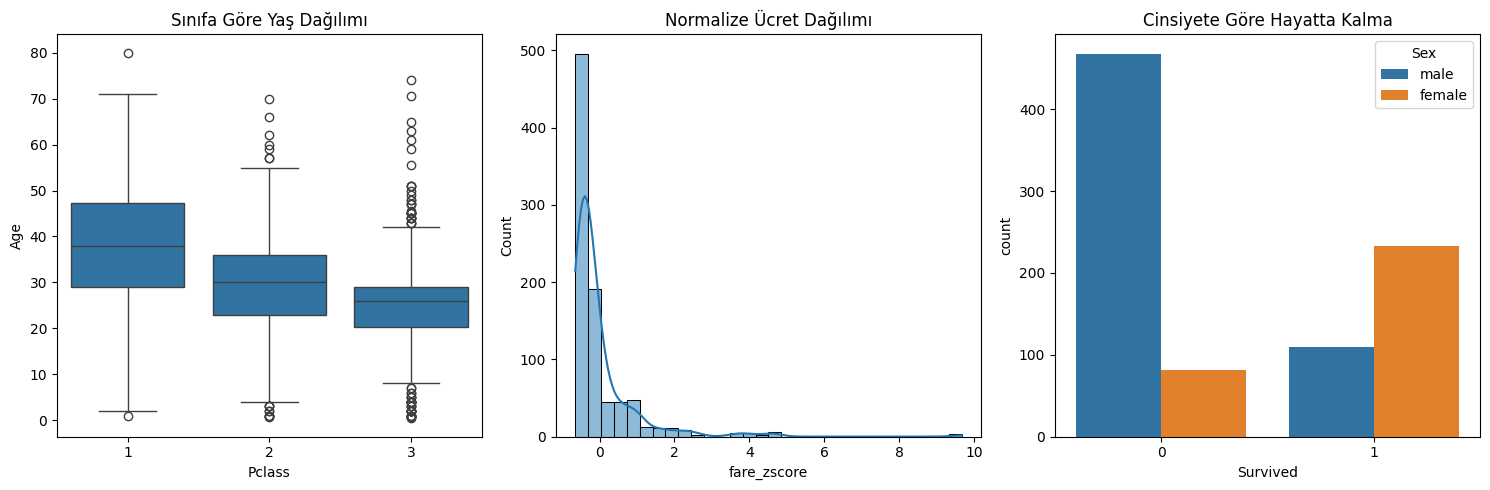


🔶 Min-Max Normalleştirilmiş Yaş:


,Age,age_min_max
0,22.0,0.271174
1,38.0,0.472229
2,26.0,0.321438
3,35.0,0.434531
4,35.0,0.434531



🔚 SON 5 SATIR:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,fare_zscore,age_min_max
886,887,0,2,"Montvila, Rev. Juozas",male,27.00,0,0,211536,13.00,NaN,S,-0.386671,0.334004
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.00,0,0,112053,30.00,B42,S,-0.044381,0.233476
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.75,1,2,W./C. 6607,23.45,NaN,S,-0.176263,0.268032
889,890,1,1,"Behr, Mr. Karl Howell",male,26.00,0,0,111369,30.00,C148,C,-0.044381,0.321438
890,891,0,3,"Dooley, Mr. Patrick",male,32.00,0,0,370376,7.75,NaN,Q,-0.492378,0.396833


In [ ]:

from google.colab import drive
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler




drive.mount('/content/drive')
file_path = "/content/drive/MyDrive/train.csv"
df = pd.read_csv(file_path)


print("⏩ İLK 5 SATIR:")
display(df.head())


print("\n❗ EKSİK VERİLER:")
missing_data = df.isnull().sum().sort_values(ascending=False)
display(missing_data[missing_data > 0])  # Sadece eksik olanları gösterir

#  'age' için grup ortalamaları hesaplar
print("\n👥 YAŞ İÇİN GRUP ORTALAMALARI (sex ve pclass'a göre):")
age_means = df.groupby(['Sex', 'Pclass'])['Age'].mean().round(1)
display(age_means)

#  Eksik yaşları doldurur
df['Age'] = df.groupby(['Sex', 'Pclass'])['Age'].transform(lambda x: x.fillna(x.mean()))

#  Fare z-score normalizasyonu yapar
from scipy import stats
df['fare_zscore'] = stats.zscore(df['Fare'])



print("Z-score istatistikleri:")
display(df['fare_zscore'].describe())

#  Görselleştirme yapar
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.boxplot(x='Pclass', y='Age', data=df)
plt.title('Sınıfa Göre Yaş Dağılımı')

plt.subplot(1,3,2)
sns.histplot(df['fare_zscore'], kde=True, bins=30)
plt.title('Normalize Ücret Dağılımı')


plt.tight_layout()
plt.show()
#  Min-Max Normalizasyonu yapar
scaler = MinMaxScaler()
df['age_min_max'] = scaler.fit_transform(df[['Age']]) # Age sütununu 0-1 arasına ölçekler

#  Normalleştirilmiş verileri gösterir
print("\n🔶 Min-Max Normalleştirilmiş Yaş:")
display(df[['Age', 'age_min_max']].head())


#  Son 5 satırı gösterir
print("\n🔚 SON 5 SATIR:")
display(df.tail())